In [1]:
#%pip install seaborn
#%matplotlib inline
#%pip install requests
#%pip install openpyxl
#%pip install xlrd
#%pip install regex

In [2]:
# librerias

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import regex as re
import statistics as stats


# para pintar

import pylab as plt
import seaborn as sns

#para que salga el grafico
%matplotlib inline

In [3]:
data_ori = pd.read_csv('Data/attacks.csv', encoding='latin1')

In [4]:
data= data_ori.copy()

In [5]:
data.head(30)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,NaN,NaN


In [6]:
data.shape

(25723, 24)

In [7]:
data.drop_duplicates(inplace = True)

In [8]:
data.shape

(6312, 24)

In [9]:
nancols = data.isnull().sum()
len(nancols[nancols>5050])  # COLUMNAS CON MÁS DEL 80% DE VALORES NULOS

2

In [10]:
lista=[]
nancols1=nancols[nancols>5050].index
for name in nancols1:
    lista.append(name)

print(lista)

['Unnamed: 22', 'Unnamed: 23']


In [11]:
data.drop(columns= lista, index = 1, inplace = True)

In [12]:
data.shape

(6311, 22)

In [13]:
def check_nan(df: pd.DataFrame) -> None:
    
    nan_cols=df.isna().mean() * 100  # el porcentaje
    
    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    plt.figure(figsize=(10, 6))  # inicia la figura y establece tamaño

    sns.heatmap(df.isna(),  # mapa de calor
                yticklabels=False,
                cmap='viridis',
                cbar=False)

    plt.show();

'N nan cols: 22'

Case Number                0.031691
Date                       0.158453
Year                       0.190144
Type                       0.221835
Country                    0.950721
Area                       7.368087
Location                   8.714942
Activity                   8.778324
Name                       3.485977
Sex                        9.111076
Age                       45.016638
Injury                     0.602123
Fatal (Y/N)                8.699097
Time                      53.303755
Species                   45.111710
Investigator or Source     0.427824
pdf                        0.158453
href formula               0.174299
href                       0.158453
Case Number.1              0.158453
Case Number.2              0.158453
original order             0.047536
dtype: float64

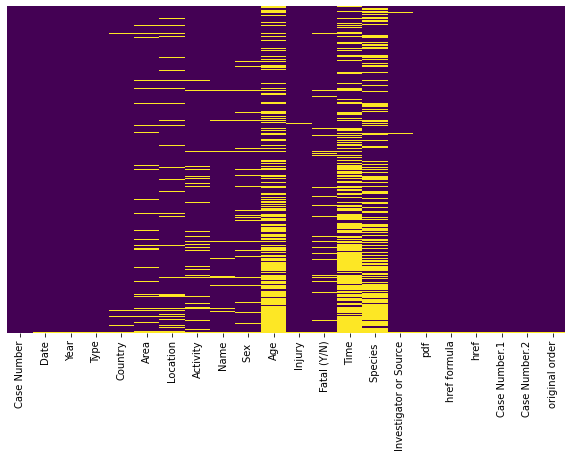

In [14]:
check_nan(data)   # AQUI PUEDO SABER QUE COLUMNA PUEDO ESTUDIAR MEJOR SIN FALSEAR DATOS

In [15]:
data.columns=[c.lower().replace(' ', '') for c in data.columns]

In [16]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0


In [17]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0


In [18]:
data.columns=[c.replace('.', '') for c in data.columns]

In [19]:
data.columns

Index(['casenumber', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal(y/n)', 'time',
       'species', 'investigatororsource', 'pdf', 'hrefformula', 'href',
       'casenumber1', 'casenumber2', 'originalorder'],
      dtype='object')

In [20]:
data.casenumber1.unique() == data.casenumber2.unique()

False

In [21]:
data[(data.casenumber1 != data.casenumber2)].tail(11)    # AQUI VEO QUE HAY MUCHAS FILAS CON MUCHOS DATOS NULOS

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber1,casenumber2,originalorder
6122,1808.06.01.R,Reported 01-May-1808,1808.0,Sea Disaster,ANTIGUA,NaN,Falmouth Harbour,NaN,NaN,NaN,NaN,Probable drowning & scavenging,NaN,NaN,NaN,"London Observer, 5/1/1808",1808.05.01.R-Antigua.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1808.05.01.R,1808.06.01.R,181.0
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0
6303,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6305.0
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
data.drop([6302, 6303, 6304, 6305, 6306, 6307, 6308, 6309, 8702, 25722], axis = 0 , inplace=True)

In [23]:
data.shape

(6301, 22)

In [24]:
nancols = data.isnull().sum()
nancols[nancols>0]

casenumber                 1
year                       2
type                       4
country                   50
area                     455
location                 540
activity                 544
name                     210
sex                      565
age                     2831
injury                    28
fatal(y/n)               539
time                    3354
species                 2837
investigatororsource      17
hrefformula                1
dtype: int64

In [25]:
print(len(data.casenumber.unique()))

6285


In [26]:
lista=[]
for e in data.casenumber:
    
    e=str(e)
    #print(e)
    
    e = e.replace('.', '-')
    e = e.replace(',', '-')
    lista.append(e)

In [27]:
data['casenumber']=lista

In [28]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber1,casenumber2,originalorder
0,2018-06-25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
2,2018-06-09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018-06-08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018-06-04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
5,2018-06-03-b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0


In [29]:
data.casenumber.fillna('unknown').head()

0      2018-06-25
2      2018-06-09
3      2018-06-08
4      2018-06-04
5    2018-06-03-b
Name: casenumber, dtype: object

In [30]:
nancols = data.isnull().sum()
nancols[nancols>0]

year                       2
type                       4
country                   50
area                     455
location                 540
activity                 544
name                     210
sex                      565
age                     2831
injury                    28
fatal(y/n)               539
time                    3354
species                 2837
investigatororsource      17
hrefformula                1
dtype: int64

In [31]:
lista2=[]
for e in data.casenumber:
    lista2.append('-'.join(e.split('-')[:3]))
            
    

In [32]:
data['casenumber']=lista2

In [33]:
data.tail()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber1,casenumber2,originalorder
6297,ND-0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,ND-0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,ND-0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,ND-0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0
6301,ND-0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0


In [34]:
data.shape

(6301, 22)

In [35]:
lista3= []
for e in data.casenumber:
    #print(e)
    if len(e) == 10:
        lista3.append(e)
    else:
        lista3.append(np.nan)
        

In [36]:
data['casenumber']=lista3    # TRANSFORMO LOS VALORES QUE SEAN INVÁLIDOS EN 'N'

In [37]:
def limpiar(string):
    
    try:
        return string.split('-')     # SEPARAR UNA COLUMNA POR AÑO, MES Y DIA
    except:
        return [np.nan, np.nan, np.nan]

In [38]:
lst=[]

for e in data.casenumber:
    lst.append(limpiar(e))
    
print(len(lst))


6301


In [39]:
data[['year_casenumber', 'month_casenumber', 'day_casenumber']]=lst

In [40]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber1,casenumber2,originalorder,year_casenumber,month_casenumber,day_casenumber
0,2018-06-25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,2018,06,25
2,2018-06-09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,2018,06,09
3,2018-06-08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,2018,06,08
4,2018-06-04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,2018,06,04
5,2018-06-03,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,2018,06,03


In [41]:
lista=[]
for e in data.date:
    
    e=str(e)
    e = e.replace('Reported ', '')#QUITO REPORTED DE LA DATE
    #print(e)
    lista.append(e)

In [42]:
data['date']=lista

In [43]:
lista=[]
for e in data.date:
    #print(e)
    lista.append(e.strip())  #QUITO ESPACIOS DELANTE Y DETRAS

In [44]:
data['date']=lista

In [45]:
lista=[]
for e in data.date:
    e = e.replace(' ','-')
    lista.append(e)

In [46]:
data['date']=lista

In [47]:
lista=[]
for e in data.date:
    if len(e) < 8:
        lista.append(np.nan)   # ANULO COLUMNAS QUE NO TENGAN MES
    else:
        lista.append(e)    

In [48]:
data['date']=lista

In [49]:
nancols = data.isnull().sum()
nancols[nancols>0]

casenumber               135
date                     324
year                       2
type                       4
country                   50
area                     455
location                 540
activity                 544
name                     210
sex                      565
age                     2831
injury                    28
fatal(y/n)               539
time                    3354
species                 2837
investigatororsource      17
hrefformula                1
year_casenumber          135
month_casenumber         135
day_casenumber           135
dtype: int64

In [50]:
(re.findall('[0-9]+', '03-May-2200')[0])

'03'

In [51]:
lista=[]

for e in data.date:
    e=str(e)
    
    if len(e) == 11:
        lista.append((re.findall('[0-9]+', e)[0]))
    else:
        lista.append('n')
        
#print(lista)           # EN VEZ DE PONER NULOS, PONGO 'N' PARA QUE SE PUEDA ITERAR
            

In [52]:
lista2=[]

for e in lista:
    
    if len(e) == 1 and e.isdigit():
        lista2.append('0' + e)
    else:
        lista2.append(e)

#print(lista2)     

In [53]:
data['day_date']= lista2

In [54]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber1,casenumber2,originalorder,year_casenumber,month_casenumber,day_casenumber,day_date
0,2018-06-25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,2018,06,25,25
2,2018-06-09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,2018,06,09,09
3,2018-06-08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,2018,06,08,08
4,2018-06-04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,2018,06,04,04
5,2018-06-03,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,2018,06,03,03


In [55]:
lista4=[]
for e in data.date:
    e=str(e)
    if len(e) == 11:     # EL 86% DE LAS COLUMNAS TIENEN LOS DATOS BIEN PUESTOS
        lista4.append(e)
        
len((lista4))

5411

In [56]:
data.shape

(6301, 26)

In [57]:
lista=[]

for e in data.date:
    e=str(e)
    
    if len(e) == 11:
        lista.append(re.findall('[a-z,A-Z]+-', e))          #LETRAS
    else:
        lista.append(['n'])
        
        
print(len(lista))                   # ESTO ME DA UNA LISTA DE LISTAS

lista2=[]

for e in lista: 
    if len(e) == 0:        
        lista2 += 'n'
    lista2 += e
    
len(lista2)   # LISTAS CON EL MES + '-'

#print(lista)

6301


6301

In [58]:
lista3=[]

for e in lista2:
    e= str(e)
    if len(e) == 4:
        e = e.replace('-', '')
        lista3.append(e)
    
    elif len(e) != 4:
        lista3.append('n')   #QUITO TODOS LOS DEMAS PORQUE ME MOLESTAN

len(lista3)     # LISTA CON LOS MESES ESCRITOS CON LETRAS
        

6301

In [59]:
lista4=[]

for e in lista3:
    e= str(e).lower()
    #print(e)
    
    if e == 'jan':
        lista4.append('01')
        
    if e == 'feb':
        lista4.append('02')
        
    if e == 'mar':
        lista4.append('03')
        
    if e == 'apr':
        lista4.append('04')
        
    if e == 'may':
        lista4.append('05')
        
    if e == 'jun':
        lista4.append('06')
        
    if e == 'jul':
        lista4.append('07')
        
    if e == 'aug':
        lista4.append('08')
        
    if e == 'sep':
        lista4.append('09')
        
    if e == 'oct':
        lista4.append('10')
        
    if e == 'nov':
        lista4.append('11')
        
    if e == 'dec':
        lista4.append('12')
        
    if e == 'n':
        lista4.append('n')
#     else:
#         lista4.append(e)          # LISTA CON NOMBRES DE MES EN DOS DIGITOS
        
len(lista4)

6301

In [60]:
data['month_date'] = lista4

In [61]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber1,casenumber2,originalorder,year_casenumber,month_casenumber,day_casenumber,day_date,month_date
0,2018-06-25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,2018,06,25,25,06
2,2018-06-09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,2018,06,09,09,06
3,2018-06-08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,2018,06,08,08,06
4,2018-06-04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,2018,06,04,04,06
5,2018-06-03,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,2018,06,03,03,06


In [62]:
nancols = data.isnull().sum()
nancols[nancols>0]            # YEAR TIENE 2 VALORES NULOS

casenumber               135
date                     324
year                       2
type                       4
country                   50
area                     455
location                 540
activity                 544
name                     210
sex                      565
age                     2831
injury                    28
fatal(y/n)               539
time                    3354
species                 2837
investigatororsource      17
hrefformula                1
year_casenumber          135
month_casenumber         135
day_casenumber           135
dtype: int64

In [63]:
data[data.year.isnull()].head()  # FILAS DONDE YEAR SEA NULO POR SI LAS PUEDO RELLENAR

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber1,casenumber2,originalorder,year_casenumber,month_casenumber,day_casenumber,day_date,month_date
187,2017-01-08,08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,35,"No attack, shark made a threat display",NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0,2017,01,08,08,01
6079,1836-08-19,19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0,1836,08,19,19,08


In [64]:
data.at[187, 'year']= 2017

In [65]:
data.at[6079, 'year']= 1836

In [66]:
lista=[]
for e in data.year:
    e= round(e)
    lista.append(e)

In [67]:
data['year'] = lista

In [68]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber1,casenumber2,originalorder,year_casenumber,month_casenumber,day_casenumber,day_date,month_date
0,2018-06-25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,2018,06,25,25,06
2,2018-06-09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,2018,06,09,09,06
3,2018-06-08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,2018,06,08,08,06
4,2018-06-04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,2018,06,04,04,06
5,2018-06-03,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,2018,06,03,03,06


In [69]:
data[data.day_casenumber != data.day_date].head()  # TENGO MUCHOS VALORES DE DIA DIFERENTES

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber1,casenumber2,originalorder,year_casenumber,month_casenumber,day_casenumber,day_date,month_date
14,2018-05-00,May-2018,2018,Provoked,AUSTRALIA,Westerm Australia,Dugong Bay,Feeding sharks,Melisa Brunning,F,34,Shallow lacerations to finger PROVOKED INCIDENT,N,NaN,"Tawny nurse shark, 2m","Perth Now, 6/30/2018",2018.05.00-Brunning.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.00,2018.05.00,6289.0,2018,05,00,n,n
37,2018-03-09,9-Mar-2018,2018,Unprovoked,AUSTRALIA,Victoria,Lorne,Swimming,Rob Crossland,M,69,"No injury, said to have been charged by sharks...",N,15h30,3.5 m shark,"B. Myatt, GSAF",2018.03.09.b-Crossland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.03.09.b,2018.03.09.b,6266.0,2018,03,09,n,n
38,2018-03-09,9-Mar-2018,2018,Unprovoked,AUSTRALIA,Victoria,Winkipop,Surfing,Lachie Brown,M,18,"Minor injury, ankle grazed",N,07h30,1.8 m shark,"B. Myatt, GSAF",2018.03.09.a-Weight.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.03.09.a,2018.03.09.a,6265.0,2018,03,09,n,n
41,2018-02-17,18-Feb-2018,2018,Provoked,AUSTRALIA,Victoria,Westernport Bay,Kayak fishing for sharks,Brett Palmer,M,34,"Shark rammed kayak, no injury to occupant PRO...",N,Night,NaN,"B. Myatt, GSAF",2018.02.17-Palmer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.02.17,2018.02.17,6262.0,2018,02,17,18,02
86,2017-09-14,Sep-2017,2017,Boating,AUSTRALIA,Westerm Australia,Esperance,Fishing,NaN,NaN,NaN,"sharks rammed boats, no injury to occupants",N,NaN,"White shark, 3.5m","B. Myatt, GSAF",2017.09.14-EsperanceBoats.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.14,2017.09.14,6217.0,2017,09,14,n,n


In [70]:
lista=[]
for e in data.day_date:
    if len(e) > 2:
        lista.append('n')
    else:
        lista.append(e)       # QUITO TODOS LOS VALORES DE DAY_DATE QUE NO SEAN DIAS

#print(lista)


In [71]:
data['day_date']= lista

In [72]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber1,casenumber2,originalorder,year_casenumber,month_casenumber,day_casenumber,day_date,month_date
0,2018-06-25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,2018,06,25,25,06
2,2018-06-09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,2018,06,09,09,06
3,2018-06-08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,2018,06,08,08,06
4,2018-06-04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,2018,06,04,04,06
5,2018-06-03,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,2018,06,03,03,06


In [73]:
lista=[]
for e in data.day_casenumber:
    if e == '00':
        lista.append('n')
    else:
        lista.append(e)
        
#print(lista)

In [74]:
data['day_casenumber']= lista

In [75]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber1,casenumber2,originalorder,year_casenumber,month_casenumber,day_casenumber,day_date,month_date
0,2018-06-25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,2018,06,25,25,06
2,2018-06-09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,2018,06,09,09,06
3,2018-06-08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,2018,06,08,08,06
4,2018-06-04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,2018,06,04,04,06
5,2018-06-03,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,2018,06,03,03,06


In [76]:
def nulos(col):
        
    if e == 'n' :                # CREO UNA FUNCION PARA SUSTITUIR LAS 'N' POR NULOS
        return (np.nan)
    else:
        return (e)
        

In [77]:
lista= []
for e in data.day_date:
    
    lista.append(nulos(data.day_date))
    
#print(lista)

In [78]:
data['day_date'] = lista

In [79]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber1,casenumber2,originalorder,year_casenumber,month_casenumber,day_casenumber,day_date,month_date
0,2018-06-25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,2018,06,25,25,06
2,2018-06-09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,2018,06,09,09,06
3,2018-06-08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,2018,06,08,08,06
4,2018-06-04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,2018,06,04,04,06
5,2018-06-03,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,2018,06,03,03,06


In [80]:
lista= []

for e in data.day_casenumber:
    lista.append(nulos(e))
len(lista)

6301

In [81]:
data['day_casenumber']= lista

In [82]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber1,casenumber2,originalorder,year_casenumber,month_casenumber,day_casenumber,day_date,month_date
0,2018-06-25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,2018,06,25,25,06
2,2018-06-09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,2018,06,09,09,06
3,2018-06-08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,2018,06,08,08,06
4,2018-06-04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,2018,06,04,04,06
5,2018-06-03,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,2018,06,03,03,06


In [83]:
lista= []

for e in data.month_date:
    lista.append(nulos(e))
len(lista)

6301

In [84]:
data['month_date']= lista

In [85]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber1,casenumber2,originalorder,year_casenumber,month_casenumber,day_casenumber,day_date,month_date
0,2018-06-25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,2018,06,25,25,06
2,2018-06-09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,2018,06,09,09,06
3,2018-06-08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,2018,06,08,08,06
4,2018-06-04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,2018,06,04,04,06
5,2018-06-03,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,2018,06,03,03,06


In [86]:
data.shape

(6301, 27)

In [87]:
data.dropna(subset=['year_casenumber', 'month_casenumber', 'day_casenumber', 'day_date', 'month_date'], inplace=True, how='all')

In [88]:
data.shape   # BORRO LAS FILAS DONDE NO TENGA UNA FECHA CLARA

(6172, 27)

In [89]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber1,casenumber2,originalorder,year_casenumber,month_casenumber,day_casenumber,day_date,month_date
0,2018-06-25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,2018,06,25,25,06
2,2018-06-09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,2018,06,09,09,06
3,2018-06-08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,2018,06,08,08,06
4,2018-06-04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,2018,06,04,04,06
5,2018-06-03,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,2018,06,03,03,06


In [90]:
data.day_date.unique()

array(['25', '09', '08', '04', '03', '27', '26', '24', '21', '13', nan,
       '12', '30', '28', '23', '22', '19', '15', '14', '10', '05', '31',
       '18', '11', '01', '20', '16', '06', '02', '29', '07', '17'],
      dtype=object)

In [91]:
nancols = data.isnull().sum()
nancols[nancols>0]              # ES MAS FACIL QUEDARME CON _CASENUMBER

casenumber                 6
date                     311
type                       4
country                   46
area                     429
location                 504
activity                 524
name                     205
sex                      557
age                     2715
injury                    27
fatal(y/n)               538
time                    3232
species                 2745
investigatororsource      17
hrefformula                1
year_casenumber            6
month_casenumber           6
day_casenumber           751
day_date                 837
month_date               837
dtype: int64

In [92]:
data.columns

Index(['casenumber', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal(y/n)', 'time',
       'species', 'investigatororsource', 'pdf', 'hrefformula', 'href',
       'casenumber1', 'casenumber2', 'originalorder', 'year_casenumber',
       'month_casenumber', 'day_casenumber', 'day_date', 'month_date'],
      dtype='object')

In [93]:
orden = ['year_casenumber','month_casenumber', 'day_casenumber', 'country', 'fatal(y/n)','sex', 'age', 'species', 'activity', 'type', 'area', 'location', 'name', 'injury', 'time', 'investigatororsource', 'originalorder', 'date', 'casenumber', 'casenumber1', 'casenumber2', 'pdf', 'hrefformula', 'href']
data= data[orden]

In [94]:
data = data.rename(columns= {'year_casenumber':'year', 'month_casenumber': 'month', 'day_casenumber': 'day'})

In [95]:
data.head()

,year,month,day,country,fatal(y/n),sex,age,species,activity,type,area,location,name,injury,time,investigatororsource,originalorder,date,casenumber,casenumber1,casenumber2,pdf,hrefformula,href
0,2018,06,25,USA,N,F,57,White shark,Paddling,Boating,California,"Oceanside, San Diego County",Julie Wolfe,"No injury to occupant, outrigger canoe and pad...",18h00,"R. Collier, GSAF",6303.0,25-Jun-2018,2018-06-25,2018.06.25,2018.06.25,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018,06,09,USA,N,M,48,NaN,Surfing,Invalid,Hawaii,"Habush, Oahu",John Denges,Injury to left lower leg from surfboard skeg,07h45,"K.McMurray, TrackingSharks.com",6301.0,09-Jun-2018,2018-06-09,2018.06.09,2018.06.09,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2018,06,08,AUSTRALIA,N,M,NaN,2 m shark,Surfing,Unprovoked,New South Wales,Arrawarra Headland,male,Minor injury to lower leg,NaN,"B. Myatt, GSAF",6300.0,08-Jun-2018,2018-06-08,2018.06.08,2018.06.08,2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2018,06,04,MEXICO,N,M,NaN,"Tiger shark, 3m",Free diving,Provoked,Colima,La Ticla,Gustavo Ramos,Lacerations to leg & hand shark PROVOKED INCIDENT,NaN,A .Kipper,6299.0,04-Jun-2018,2018-06-04,2018.06.04,2018.06.04,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
5,2018,06,03,AUSTRALIA,N,M,NaN,NaN,Kite surfing,Unprovoked,New South Wales,"Flat Rock, Ballina",Chris,"No injury, board bitten",NaN,"Daily Telegraph, 6/4/2018",6298.0,03-Jun-2018,2018-06-03,2018.06.03.b,2018.06.03.b,2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...


In [96]:
nancols = data.isnull().sum()
nancols[nancols>0]

year                       6
month                      6
day                      751
country                   46
fatal(y/n)               538
sex                      557
age                     2715
species                 2745
activity                 524
type                       4
area                     429
location                 504
name                     205
injury                    27
time                    3232
investigatororsource      17
date                     311
casenumber                 6
hrefformula                1
dtype: int64

In [97]:
borrar = data[data.month.isnull()].index  #BORRO LAS FILAS DONDE MONTH SEA NULO

In [98]:
data.drop(borrar, axis=0, inplace = True)

In [99]:
data[data.month == '94']

,year,month,day,country,fatal(y/n),sex,age,species,activity,type,area,location,name,injury,time,investigatororsource,originalorder,date,casenumber,casenumber1,casenumber2,pdf,hrefformula,href
6009,1853,94,29,GREECE,N,M,NaN,234-lb shark,Swimming,Unprovoked,Corfu,NaN,Hanson,Leg severed at knee,NaN,"South Australian Register, 5/8/1854",294.0,29-Apr-1853,1853-94-29,1853.04.29,"1853,94.29",1853.04.29-Hanson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...


In [100]:
data.drop([6009], axis=0, inplace = True)

In [101]:
data[data.month == '00'].tail()   # 400 COLUMNAS DE MONTH TIENEN '00'

,year,month,day,country,fatal(y/n),sex,age,species,activity,type,area,location,name,injury,time,investigatororsource,originalorder,date,casenumber,casenumber1,casenumber2,pdf,hrefformula,href
6172,1554,00,NaN,FRANCE,UNKNOWN,M,NaN,Possibly white sharks,NaN,Unprovoked,Nice & Marseilles,NaN,males (wearing armor),NaN,NaN,G. Rondelet,131.0,Ca.-1554,1554-00-00,1554.00.00,1554.00.00,1554.00.00-Rondelet.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
6173,1543,00,NaN,VENEZUELA,Y,M,NaN,NaN,Pearl diving,Unprovoked,Magarita or Cubagua Islands,NaN,Indian slave,FATAL,NaN,J. Castro,130.0,Ca.-1543,1543-00-00,1543.00.00,1543.00.00,1543.00.00.R-LasCasas.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
6174,0500,00,NaN,MEXICO,N,M,NaN,NaN,NaN,Unprovoked,NaN,NaN,male,Foot severed,NaN,J. Castro,129.0,Circa-500-A.D.,0500-00-00,0500.00.00,0500.00.00,500AD-Mexico.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
6175,0077,00,NaN,NaN,Y,M,NaN,NaN,Sponge diving,Unprovoked,Ionian Sea,NaN,males,FATAL,NaN,Perils mentioned by Pliny the Elder (23 A.D. t...,128.0,77--A.D.,0077-00-00,0077.00.00,0077.00.00,77AD-Pliny.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
6176,0005,00,NaN,AUSTRALIA,N,M,NaN,NaN,NaN,Unprovoked,New South Wales,Bondi,male,Aboriginal rock carving depicts man being atta...,NaN,Waverly Library,127.0,Ca.-5-A.D.,0005-00-00,0005.00.00,0005.00.00,0005.00.00-AustralianAboriginal.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...


In [102]:
data['month'].bfill().head()  # INTENTO RELLENARLAS CON BFILL PERO NO RELLENA NINGUNA

0    06
2    06
3    06
4    06
5    06
Name: month, dtype: object

In [103]:
data.drop([6174, 6175, 6176], inplace = True)

In [104]:
data[data.day == 38]

,year,month,day,country,fatal(y/n),sex,age,species,activity,type,area,location,name,injury,time,investigatororsource,originalorder,date,casenumber,casenumber1,casenumber2,pdf,hrefformula,href


In [105]:
data.drop([5777], inplace = True)

In [106]:
data.describe(include='all')

,year,month,day,country,fatal(y/n),sex,age,species,activity,type,area,location,name,injury,time,investigatororsource,originalorder,date,casenumber,casenumber1,casenumber2,pdf,hrefformula,href
count,6161,6161,5419,6116,5623,5605,3453,3422,5639,6157,5734,5660,5956,6134,2938,6144,6161.000000,5850,6161,6161,6161,6161,6160,6161
unique,246,13,31,206,8,6,156,1532,1491,8,801,4042,5145,3681,365,4869,NaN,5135,5193,6144,6145,6150,6149,6144
top,2015,07,26,USA,N,M,17,White shark,Surfing,Unprovoked,Florida,"New Smyrna Beach, Volusia County",male,FATAL,Afternoon,"C. Moore, GSAF",NaN,Oct-1960,1950-00-00,1962.06.11.b,1962.06.11.b,1931.09.21.a-b-Holaday-Barrows.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
freq,143,669,210,2206,4218,4977,154,162,969,4474,1026,163,520,764,183,102,NaN,5,13,2,2,2,2,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3218.087973,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1781.934010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1675.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3218.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4762.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
data.head()

,year,month,day,country,fatal(y/n),sex,age,species,activity,type,area,location,name,injury,time,investigatororsource,originalorder,date,casenumber,casenumber1,casenumber2,pdf,hrefformula,href
0,2018,06,25,USA,N,F,57,White shark,Paddling,Boating,California,"Oceanside, San Diego County",Julie Wolfe,"No injury to occupant, outrigger canoe and pad...",18h00,"R. Collier, GSAF",6303.0,25-Jun-2018,2018-06-25,2018.06.25,2018.06.25,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018,06,09,USA,N,M,48,NaN,Surfing,Invalid,Hawaii,"Habush, Oahu",John Denges,Injury to left lower leg from surfboard skeg,07h45,"K.McMurray, TrackingSharks.com",6301.0,09-Jun-2018,2018-06-09,2018.06.09,2018.06.09,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2018,06,08,AUSTRALIA,N,M,NaN,2 m shark,Surfing,Unprovoked,New South Wales,Arrawarra Headland,male,Minor injury to lower leg,NaN,"B. Myatt, GSAF",6300.0,08-Jun-2018,2018-06-08,2018.06.08,2018.06.08,2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2018,06,04,MEXICO,N,M,NaN,"Tiger shark, 3m",Free diving,Provoked,Colima,La Ticla,Gustavo Ramos,Lacerations to leg & hand shark PROVOKED INCIDENT,NaN,A .Kipper,6299.0,04-Jun-2018,2018-06-04,2018.06.04,2018.06.04,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
5,2018,06,03,AUSTRALIA,N,M,NaN,NaN,Kite surfing,Unprovoked,New South Wales,"Flat Rock, Ballina",Chris,"No injury, board bitten",NaN,"Daily Telegraph, 6/4/2018",6298.0,03-Jun-2018,2018-06-03,2018.06.03.b,2018.06.03.b,2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...


In [108]:
data.dtypes

year                     object
month                    object
day                      object
country                  object
fatal(y/n)               object
sex                      object
age                      object
species                  object
activity                 object
type                     object
area                     object
location                 object
name                     object
injury                   object
time                     object
investigatororsource     object
originalorder           float64
date                     object
casenumber               object
casenumber1              object
casenumber2              object
pdf                      object
hrefformula              object
href                     object
dtype: object

In [109]:
nancols = data.isnull().sum()
nancols[nancols>0]

day                      742
country                   45
fatal(y/n)               538
sex                      556
age                     2708
species                 2739
activity                 522
type                       4
area                     427
location                 501
name                     205
injury                    27
time                    3223
investigatororsource      17
date                     311
hrefformula                1
dtype: int64

In [110]:
#RELLENO CON LA MODA PORQUE NO DEPENDE DE LA FECHA Y SON POCOS VALORES

data.fillna({'country': 'USA', 'type': 'Unprovoked', 'injury': 'FATAL', 'investigatororsource': 'C. Moore, GSAF', 'hrefformula' : 'NF'}, inplace = True)

In [111]:
nancols = data.isnull().sum()
nancols[nancols>0]

day            742
fatal(y/n)     538
sex            556
age           2708
species       2739
activity       522
area           427
location       501
name           205
time          3223
date           311
dtype: int64

In [112]:
data.age.unique() 

array(['57', '48', nan, '18', '52', '15', '12', '32', '10', '21', '34',
       '30', '60', '33', '29', '54', '41', '37', '56', '19', '25', '69',
       '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24', '26',
       '49', '22', '7', '31', '17', '40', '13', '42', '3', '11', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',
  

In [113]:
lista=[]

for e in data.age:
    
    try:
        lista.append((re.findall('[0-9]+', e)[0]))
    except:
        lista.append(np.nan)
        
print(len(lista))
    
    
  

6161


In [114]:
data['age']= lista

In [115]:
nancols = data.isnull().sum()
nancols[nancols>0]

day            742
fatal(y/n)     538
sex            556
age           2738
species       2739
activity       522
area           427
location       501
name           205
time          3223
date           311
dtype: int64

In [116]:
data.rename(columns={'fatal(y/n)': 'fatal'}, inplace =True)

In [117]:
data.head()

,year,month,day,country,fatal,sex,age,species,activity,type,area,location,name,injury,time,investigatororsource,originalorder,date,casenumber,casenumber1,casenumber2,pdf,hrefformula,href
0,2018,06,25,USA,N,F,57,White shark,Paddling,Boating,California,"Oceanside, San Diego County",Julie Wolfe,"No injury to occupant, outrigger canoe and pad...",18h00,"R. Collier, GSAF",6303.0,25-Jun-2018,2018-06-25,2018.06.25,2018.06.25,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018,06,09,USA,N,M,48,NaN,Surfing,Invalid,Hawaii,"Habush, Oahu",John Denges,Injury to left lower leg from surfboard skeg,07h45,"K.McMurray, TrackingSharks.com",6301.0,09-Jun-2018,2018-06-09,2018.06.09,2018.06.09,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2018,06,08,AUSTRALIA,N,M,NaN,2 m shark,Surfing,Unprovoked,New South Wales,Arrawarra Headland,male,Minor injury to lower leg,NaN,"B. Myatt, GSAF",6300.0,08-Jun-2018,2018-06-08,2018.06.08,2018.06.08,2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2018,06,04,MEXICO,N,M,NaN,"Tiger shark, 3m",Free diving,Provoked,Colima,La Ticla,Gustavo Ramos,Lacerations to leg & hand shark PROVOKED INCIDENT,NaN,A .Kipper,6299.0,04-Jun-2018,2018-06-04,2018.06.04,2018.06.04,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
5,2018,06,03,AUSTRALIA,N,M,NaN,NaN,Kite surfing,Unprovoked,New South Wales,"Flat Rock, Ballina",Chris,"No injury, board bitten",NaN,"Daily Telegraph, 6/4/2018",6298.0,03-Jun-2018,2018-06-03,2018.06.03.b,2018.06.03.b,2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...


In [118]:
data.head()

,year,month,day,country,fatal,sex,age,species,activity,type,area,location,name,injury,time,investigatororsource,originalorder,date,casenumber,casenumber1,casenumber2,pdf,hrefformula,href
0,2018,06,25,USA,N,F,57,White shark,Paddling,Boating,California,"Oceanside, San Diego County",Julie Wolfe,"No injury to occupant, outrigger canoe and pad...",18h00,"R. Collier, GSAF",6303.0,25-Jun-2018,2018-06-25,2018.06.25,2018.06.25,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018,06,09,USA,N,M,48,NaN,Surfing,Invalid,Hawaii,"Habush, Oahu",John Denges,Injury to left lower leg from surfboard skeg,07h45,"K.McMurray, TrackingSharks.com",6301.0,09-Jun-2018,2018-06-09,2018.06.09,2018.06.09,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2018,06,08,AUSTRALIA,N,M,NaN,2 m shark,Surfing,Unprovoked,New South Wales,Arrawarra Headland,male,Minor injury to lower leg,NaN,"B. Myatt, GSAF",6300.0,08-Jun-2018,2018-06-08,2018.06.08,2018.06.08,2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2018,06,04,MEXICO,N,M,NaN,"Tiger shark, 3m",Free diving,Provoked,Colima,La Ticla,Gustavo Ramos,Lacerations to leg & hand shark PROVOKED INCIDENT,NaN,A .Kipper,6299.0,04-Jun-2018,2018-06-04,2018.06.04,2018.06.04,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
5,2018,06,03,AUSTRALIA,N,M,NaN,NaN,Kite surfing,Unprovoked,New South Wales,"Flat Rock, Ballina",Chris,"No injury, board bitten",NaN,"Daily Telegraph, 6/4/2018",6298.0,03-Jun-2018,2018-06-03,2018.06.03.b,2018.06.03.b,2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...


In [119]:
# data.day=data.day.astype(dtype='float64')
# data.month=data.month.astype(dtype='float64')
# data.year=data.year.astype(dtype='float64')

In [120]:
# lista=[]
# for e in data.year:
#     e= round(e)
#     lista.append(e)
    
# data['year']= lista

# lista=[]
# for e in data.month:
#     e= round(e)
#     lista.append(e)
    
# data['month']= lista

In [121]:
data.describe(include= 'all')

,year,month,day,country,fatal,sex,age,species,activity,type,area,location,name,injury,time,investigatororsource,originalorder,date,casenumber,casenumber1,casenumber2,pdf,hrefformula,href
count,6161,6161,5419,6161,5623,5605,3423,3422,5639,6161,5734,5660,5956,6161,2938,6161,6161.000000,5850,6161,6161,6161,6161,6161,6161
unique,246,13,31,206,8,6,81,1532,1491,8,801,4042,5145,3681,365,4869,NaN,5135,5193,6144,6145,6150,6150,6144
top,2015,07,26,USA,N,M,17,White shark,Surfing,Unprovoked,Florida,"New Smyrna Beach, Volusia County",male,FATAL,Afternoon,"C. Moore, GSAF",NaN,Oct-1960,1950-00-00,1962.06.11.b,1962.06.11.b,1931.09.21.a-b-Holaday-Barrows.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
freq,143,669,210,2251,4218,4977,156,162,969,4478,1026,163,520,791,183,119,NaN,5,13,2,2,2,2,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3218.087973,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1781.934010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1675.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3218.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4762.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
lista=[]
for e in data.country:
    e = e.strip()
    lista.append(e)
data['country']= lista

In [123]:
nancols = data.isnull().sum()
nancols[nancols>0]

day          742
fatal        538
sex          556
age         2738
species     2739
activity     522
area         427
location     501
name         205
time        3223
date         311
dtype: int64

In [124]:
data.fatal.fillna('unknown', inplace = True)
data.sex.fillna('unknown', inplace = True)
data.age.fillna('unknown', inplace = True)
data.species.fillna('unknown', inplace = True)
data.activity.fillna('unknown', inplace = True)
data.area.fillna('unknown', inplace = True)
data.location.fillna('unknown', inplace = True)
data.date.fillna('unknown', inplace = True)
data.time.fillna('unknown', inplace = True)
data.name.fillna('unknown', inplace = True)

In [125]:
nancols = data.isnull().sum()
nancols[nancols>0]

day    742
dtype: int64

In [126]:
data.day.unique()

array(['25', '09', '08', '04', '03', '27', '26', '24', '21', '13', nan,
       '12', '30', '28', '23', '22', '19', '15', '14', '10', '05', '31',
       '17', '11', '01', '18', '20', '16', '06', '02', '29', '07'],
      dtype=object)

In [127]:
data.head()

,year,month,day,country,fatal,sex,age,species,activity,type,area,location,name,injury,time,investigatororsource,originalorder,date,casenumber,casenumber1,casenumber2,pdf,hrefformula,href
0,2018,06,25,USA,N,F,57,White shark,Paddling,Boating,California,"Oceanside, San Diego County",Julie Wolfe,"No injury to occupant, outrigger canoe and pad...",18h00,"R. Collier, GSAF",6303.0,25-Jun-2018,2018-06-25,2018.06.25,2018.06.25,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018,06,09,USA,N,M,48,unknown,Surfing,Invalid,Hawaii,"Habush, Oahu",John Denges,Injury to left lower leg from surfboard skeg,07h45,"K.McMurray, TrackingSharks.com",6301.0,09-Jun-2018,2018-06-09,2018.06.09,2018.06.09,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2018,06,08,AUSTRALIA,N,M,unknown,2 m shark,Surfing,Unprovoked,New South Wales,Arrawarra Headland,male,Minor injury to lower leg,unknown,"B. Myatt, GSAF",6300.0,08-Jun-2018,2018-06-08,2018.06.08,2018.06.08,2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2018,06,04,MEXICO,N,M,unknown,"Tiger shark, 3m",Free diving,Provoked,Colima,La Ticla,Gustavo Ramos,Lacerations to leg & hand shark PROVOKED INCIDENT,unknown,A .Kipper,6299.0,04-Jun-2018,2018-06-04,2018.06.04,2018.06.04,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
5,2018,06,03,AUSTRALIA,N,M,unknown,unknown,Kite surfing,Unprovoked,New South Wales,"Flat Rock, Ballina",Chris,"No injury, board bitten",unknown,"Daily Telegraph, 6/4/2018",6298.0,03-Jun-2018,2018-06-03,2018.06.03.b,2018.06.03.b,2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...


In [128]:
data.species.replace({'"':'', '.': '', '?': '', "'": '', '+': '', ',': '', 'x':'', '[':'', ']':'', '-':''}).head()

0        White shark
2            unknown
3          2 m shark
4    Tiger shark, 3m
5            unknown
Name: species, dtype: object

In [129]:
lista= [e.strip() for e in data.sex]
data['sex']= lista

In [130]:
data.sex.unique()

array(['F', 'M', 'unknown', 'lli', 'N', '.'], dtype=object)

In [131]:
data.sex.replace({'lli': 'unknown', 'N': 'unknown', '.': 'unknown'}).head()


0    F
2    M
3    M
4    M
5    M
Name: sex, dtype: object

In [132]:
data.sex.unique()

array(['F', 'M', 'unknown', 'lli', 'N', '.'], dtype=object)

In [133]:
data.type.unique()

array(['Boating', 'Invalid', 'Unprovoked', 'Provoked', 'Questionable',
       'Sea Disaster', 'Boat', 'Boatomg'], dtype=object)

In [134]:
data.type.replace('Boat', 'Boating', inplace= True)

In [135]:
data2 = data.copy()

In [136]:
data2.drop(['area','location', 'name', 'injury', 'time',
       'investigatororsource', 'originalorder', 'date', 'casenumber',
       'casenumber1', 'casenumber2', 'pdf', 'hrefformula', 'href'], axis = 1, inplace = True)

In [137]:
data2.head()

,year,month,day,country,fatal,sex,age,species,activity,type
0,2018,06,25,USA,N,F,57,White shark,Paddling,Boating
2,2018,06,09,USA,N,M,48,unknown,Surfing,Invalid
3,2018,06,08,AUSTRALIA,N,M,unknown,2 m shark,Surfing,Unprovoked
4,2018,06,04,MEXICO,N,M,unknown,"Tiger shark, 3m",Free diving,Provoked
5,2018,06,03,AUSTRALIA,N,M,unknown,unknown,Kite surfing,Unprovoked


In [138]:
data2.groupby('country').count().sort_values('month',ascending = False).head(6)

,year,month,day,fatal,sex,age,species,activity,type
country,,,,,,,,,
USA,2251,2251,2088,2251,2251,2251,2251,2251,2251
AUSTRALIA,1320,1320,1235,1320,1320,1320,1320,1320,1320
SOUTH AFRICA,571,571,523,571,571,571,571,571,571
PAPUA NEW GUINEA,130,130,77,130,130,130,130,130,130
NEW ZEALAND,127,127,111,127,127,127,127,127,127
BRAZIL,111,111,106,111,111,111,111,111,111


In [139]:
data2 = data2[(data2.country == 'USA') | (data2.country == 'AUSTRALIA') | (data2.country == 'SOUTH AFRICA') | (data2.country == 'BRAZIL') | (data2.country == 'NEW ZEALAND')]

In [143]:
data2.groupby('country').agg(stats.mode).head()

TypeError: no numeric data to plot

<AxesSubplot:xlabel='country'>

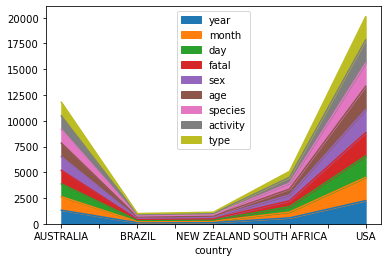

In [152]:
data2.groupby('country').count().plot(kind = "area")